In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
df = pd.read_csv("titanic.csv") 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
#Drop irrelevant features 
df.drop(columns=['Name', 'PassengerId', 'Cabin', 'Ticket'], inplace=True) 

In [6]:
#Fill missing Age with median, Embarked with mode 
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [7]:
print(df.isnull().sum()) 

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [8]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex']) 
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [9]:
df['Familysize'] = df['SibSp'] + df['Parch'] +1 
# Drop Parch and SibSp 
df.drop(columns=['SibSp', 'Parch'], inplace=True) 

In [10]:
# Feature Scaling 
scaler = StandardScaler() 
scaled_features = scaler.fit_transform(df.drop('Survived', axis=1)) 
X = pd.DataFrame(scaled_features, columns=df.drop('Survived', axis=1).columns) 

y =df['Survived'] 


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 


In [12]:
model = LogisticRegression() 
params = { 
    'C':[0.01, 0.1, 10],
'solver': ['liblinear', 'lbfgs']
}
grid = GridSearchCV(model, param_grid=params, cv=5, scoring="accuracy") 
grid.fit(X_train, y_train) 
best_model = grid.best_estimator_ 

In [13]:
y_pred = best_model.predict(X_test) 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred)) 
print("\nClassification Report:\n", classification_report(y_test, y_pred)) 
print("Accuracy:", accuracy_score(y_test, y_pred)) 

Confusion Matrix:
 [[136  21]
 [ 31  80]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.72      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268

Accuracy: 0.8059701492537313


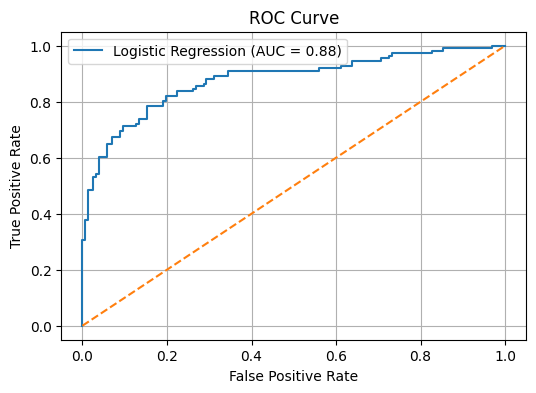

In [14]:
y_probs = best_model.predict_proba(X_test)[:,1] 
auc_score = roc_auc_score(y_test, y_probs) 
fpr, tpr, thresholds = roc_curve(y_test, y_probs) 
plt. figure(figsize=(6,4)) 
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_score:.2f})") 
plt.plot([0, 1], [0, 1], linestyle="--") 
plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate") 
plt.title("ROC Curve") 
plt. legend() 
plt.grid() 
plt.show() 

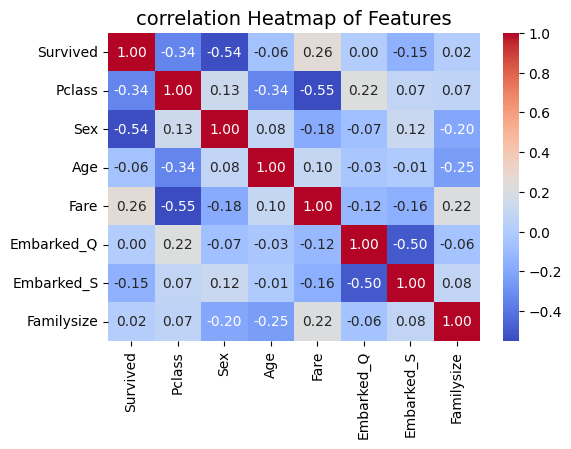

In [15]:
plt.figure(figsize=(6, 4)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f') 
plt.title("correlation Heatmap of Features", fontsize=14) 
plt.show() 

C:\Users\Pratik Bhilore\AppData\Local\Temp\ipykernel_18172\3910566637.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette="muted")


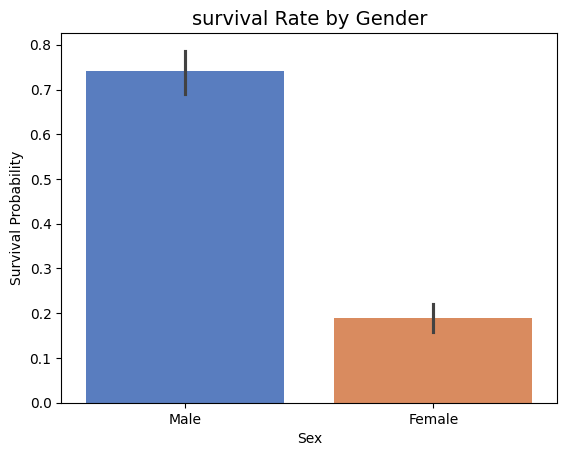

In [16]:
sns.barplot(x='Sex', y='Survived', data=df, palette="muted") 
plt.xticks([0, 1], ['Male', 'Female']) 
plt.title("survival Rate by Gender", fontsize=14) 
plt.ylabel("Survival Probability") 
plt.show() 

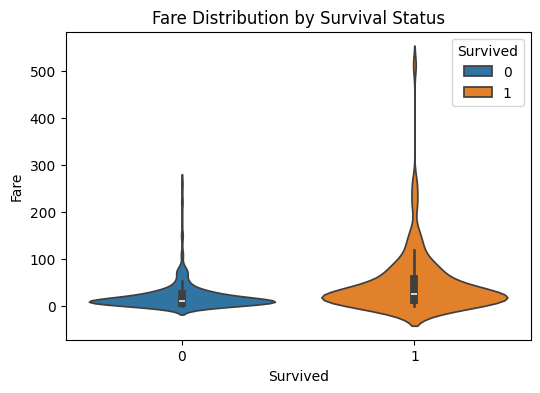

In [17]:
plt.figure(figsize=(6, 4)) 
sns.violinplot(x='Survived', hue='Survived', y='Fare', data=df) 
plt.title("Fare Distribution by Survival Status") 
plt.xlabel("Survived") 
plt.ylabel("Fare") 
plt.show()

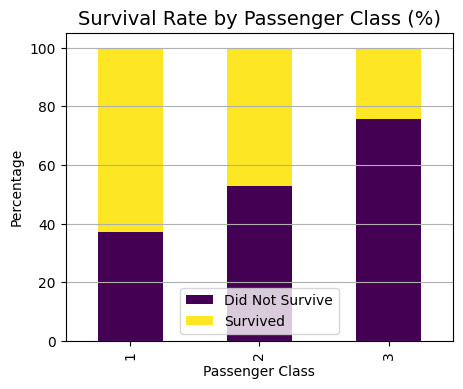

In [18]:
ct = pd.crosstab(df['Pclass'], df["Survived"], normalize='index') * 100 
ct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(5, 4)) 
plt.title("Survival Rate by Passenger Class (%)", fontsize=14) 
plt.ylabel ("Percentage") 
plt.xlabel("Passenger Class") 
plt.legend(["Did Not Survive", "Survived"]) 
plt.grid(axis='y') 
plt.show() 